In [2]:
from base import np, h5py

import importlib
import threeD
importlib.reload(threeD)
from threeD import FluxMap3D

# Export figures to Folder
figures_path = "../TFG_latex/Figures/FluxMap3D/"

# Generalising Step Concentrations

Concentration profile described by a spherical shell with inner radii ($r_0$) and thicknesses ($\lambda$), with the restriction $r_0 + \lambda \leq L$.

$$
c_{\text{shell}}(r; r_0,\lambda) = 
\begin{cases} 
\frac{3}{4 \pi} \frac{1}{\lambda^3 + 3 \lambda^2 r_0 + 3 \lambda r_0^2} & \text{if } r_0 \leq r \leq r_0 + \lambda, \\
0 & \text{otherwise}.
\end{cases}
$$

In [4]:
def shell_generator(rho, lambda_):
    'Define the inner step function that takes r as parameter'
    def c_shell(r):
        'Determine the condition based on rho and lambda_'
        cond = (r >= rho) & (r <= rho + lambda_)
        c = 3/(4*np.pi) * 1/(lambda_**3 + 3 * lambda_**2 * rho + 3 * lambda_ * rho**2)
        # Return c where cond == True, else 0
        return np.where(cond , c , 0)
    return c_shell

syst_params = {
    # Space Boundaries
    'R_dtm' : 1, 'R_inf' : 100, # 1000 !!!!! nr *= 10
    # Max Bacterial Boundary
    'L' : 10,
    'alpha': None,
    # Number of points
    'nr': 100, # Weird triangles appear if it's too low
    'n_rho': 250,'n_lambda': 250
}

### FluxMaps: $\quad \lambda \in [0, L-R_D] = [0,10-1]$

In [5]:
syst_params['alpha'] = 1e2

FM = FluxMap3D(syst_params, shell_generator)
FM.solve(n_jobs=-1)
FM.save_data('c_shell(r)_alpha=1e2')

ODEs solved: 100%|██████████| 31126/31126 [00:04<00:00, 6299.31it/s] 


In [ ]:
FM.load_data('c_shell(r)_alpha=1e2')
FM.plot()
FM.save(figures_path, 'c_shell(r)_alpha=1e2')
print(f'Tc/Td = {FM.T_ratio:.4f}')

Minimum flux: Phi(1.181, 1.440)=0.287
Maximum flux: Phi(1.000, 0.036)=0.883


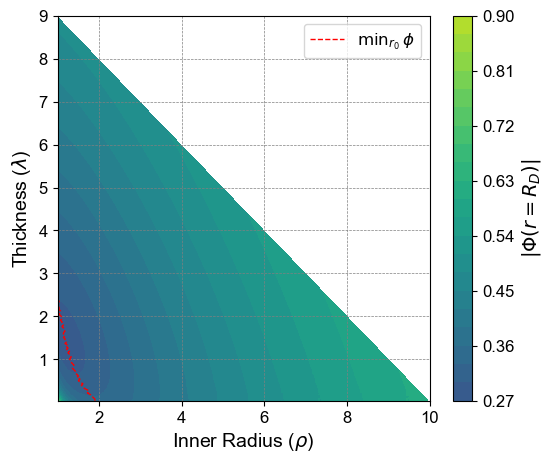

In [ ]:
# Get the flux map
φ = FM.flux_map

# Find the positions where these minima occur
minr0_indices = [np.nanargmin(φi) for φi in φ.T] # ignoring NaN values
# Get the corresponding values for the maximum flux
r0_transect = [FM.x_values[i] for i in minr0_indices]

# Plot the flux map
FM.plot()

# Add the maximum flux line connecting the maxima
FM.ax.plot(r0_transect, FM.y_values, 'r--', label='$\\text{min}_{r_0} \\, \\phi$', linewidth=1)
FM.ax.legend();

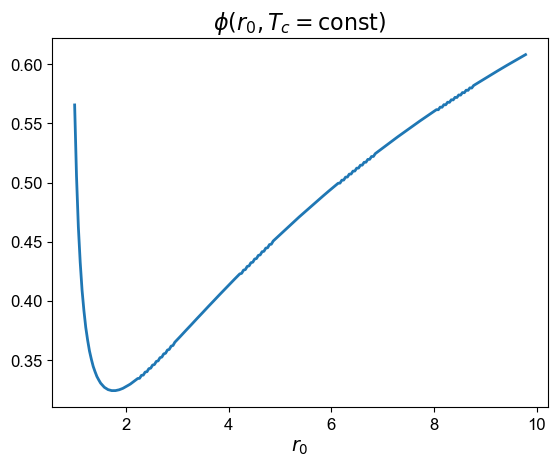

In [5]:
import matplotlib.pyplot as plt
plt.plot(FM.x_values, φ[:,5])
plt.xlabel('$r_0$')
plt.title('$\\phi(r_0, T_c=\\text{const})$');

ODEs solved: 100%|██████████| 31126/31126 [04:51<00:00, 106.76it/s]


Minimum flux: Phi(1.976, 0.036)=0.840
Maximum flux: Phi(1.000, 0.036)=0.995


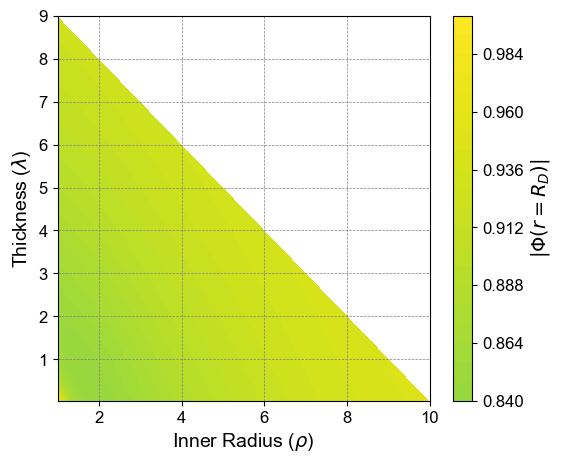

In [ ]:
syst_params['alpha'] = 1e1

FM = FluxMap3D(syst_params, shell_generator)
FM.solve(n_jobs=-1)
FM.plot()
FM.save(figures_path, 'c_shell(r)_alpha=1e1')

### FluxMaps: $\quad \lambda \in [0, L-R_D] = [0,3-1]$ ❌📄

ODEs solved:  48%|████▊     | 14864/31126 [01:37<01:23, 194.01it/s]c:\Users\jorge\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
ODEs solved: 100%|██████████| 31126/31126 [03:52<00:00, 133.85it/s]


Minimum flux: Phi(1.209, 1.400)=0.287
Maximum flux: Phi(1.000, 0.008)=0.975


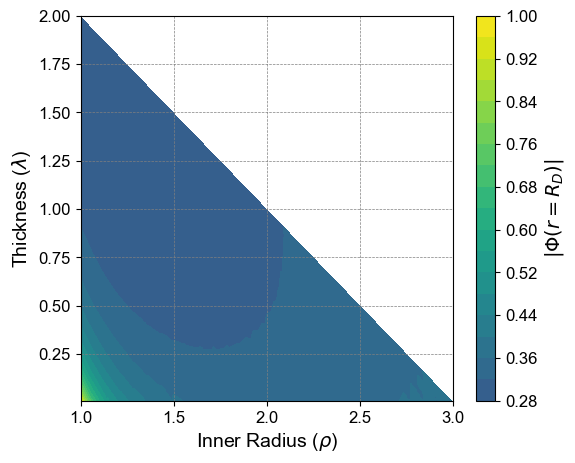

In [7]:
syst_params['L'] = 3
syst_params['alpha'] = 1e2

FM = FluxMap3D(syst_params, shell_generator)
FM.solve(n_jobs=-1)
FM.plot()

In [8]:
syst_params['alpha'] = 1e1

FM = FluxMap3D(syst_params, shell_generator)
FM.solve(n_jobs=-1)
FM.plot()

ODEs solved:  40%|████      | 12504/31126 [01:45<01:44, 178.57it/s]

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

ODEs solved:  40%|████      | 12504/31126 [02:04<01:44, 178.57it/s]

ODEs solved: 100%|██████████| 31126/31126 [03:37<00:00, 143.03it/s]


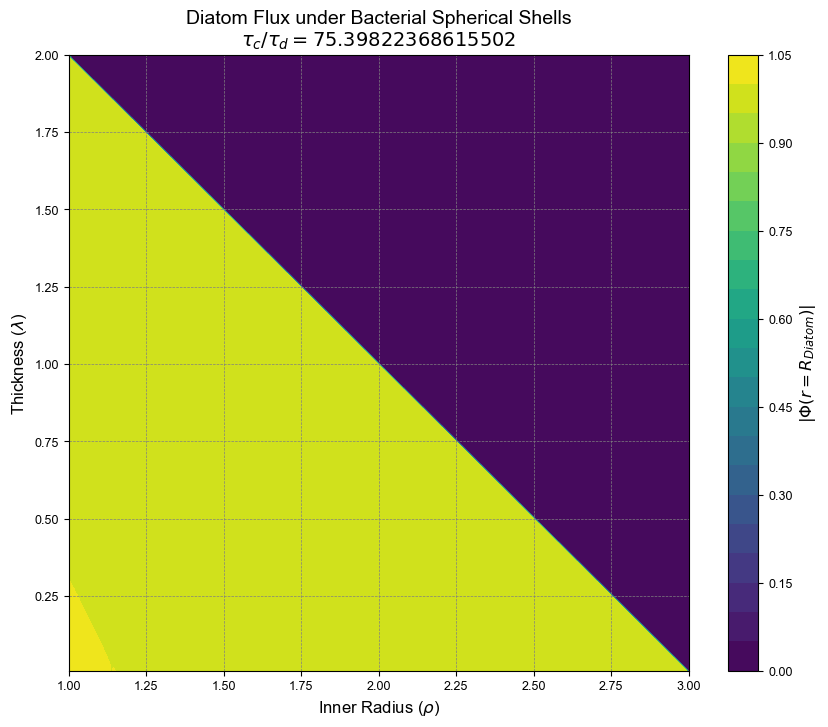

In [ ]:
syst_params['alpha'] = 1e0
FM = FluxMap3D(syst_params, shell_generator)
FM.solve(n_jobs=-1)
FM.plot()

ODEs solved: 100%|██████████| 31126/31126 [03:42<00:00, 140.14it/s]


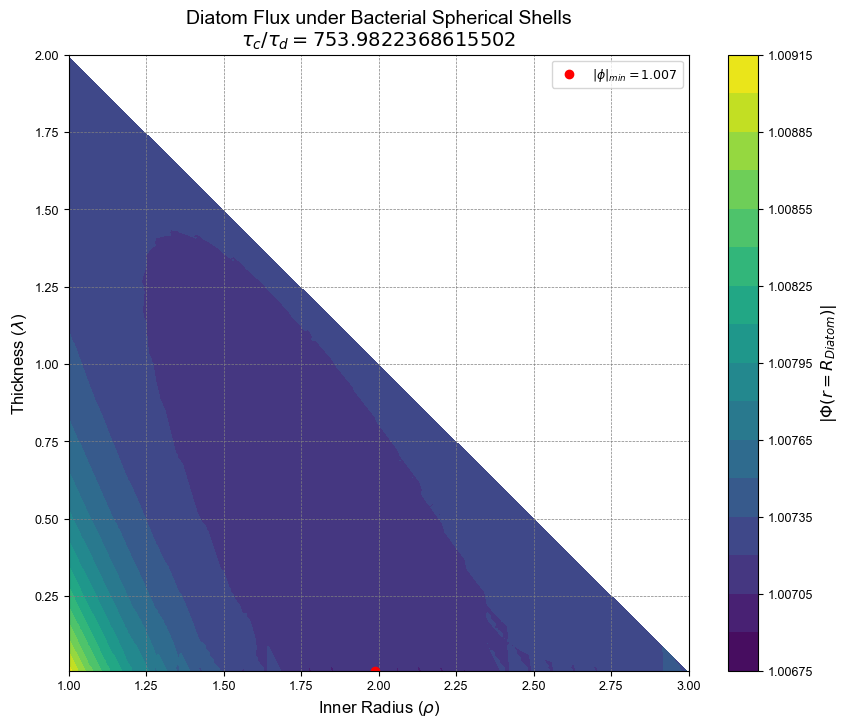

In [ ]:
syst_params['alpha'] = 1e-1
FM = FluxMap3D(syst_params, shell_generator)
FM.solve(n_jobs=-1)
FM.plot(set_nans=True, set_min=True)